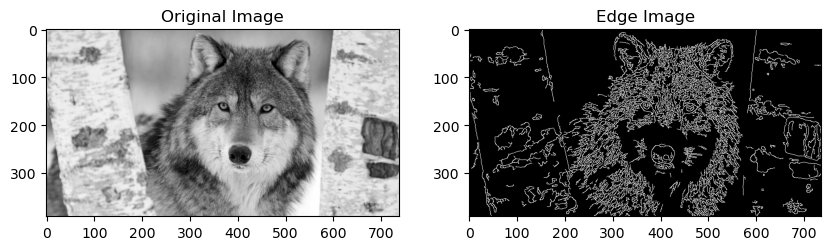

In [1]:
"""Canny edge Dtection"""
import cv2
import matplotlib.pyplot as plt
image_path = r"C:\Users\BhavyeBhasin\Downloads\wolfss.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 75, 200)#used to adjust the threshold value for edge detection
plt.figure(figsize=(10, 5))# Display the original image and the edges side by side
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.show()


In [2]:
Canny Edge Detection:

Canny edge detection is a popular technique used in computer vision and image processing to identify edges 
(boundaries) within an image.
The algorithm involves several steps:

-Noise Reduction: Apply Gaussian smoothing to reduce noise interference.
-Gradient Computation: Compute the gradient magnitude and direction.
-Non-Maximum Suppression: Suppress non-maximum gradient values to highlight edges.
-Hysteresis Thresholding: Set high and low thresholds to detect strong and weak edges.
-The result is a binary edge map where edges are highlighted.
    
Advantages:
-Accurate Edge Localization: Canny provides precise edge positions, identifying single-pixel-wide edges.
-Low Error Rate: It minimizes false positives and false negatives.
-Automatic Thresholding: Canny determines optimal thresholds automatically.
-Robust to Noise: Gaussian smoothing helps handle noisy images.
-Thin Edges: Canny produces thin edges, useful for subsequent processing (e.g., object recognition).
Disadvantages:
-Computationally Intensive: Canny involves multiple steps, making it computationally expensive.
-Threshold Sensitivity: Performance depends on threshold choices (high and low).
-Parameter Tuning: Users need to set parameters (e.g., kernel size, sigma) carefully.
-Texture Challenges: May struggle with textured regions or noisy textures.
-Scale and Rotation Invariance: Canny does not handle scale or rotation variations well.

SyntaxError: invalid syntax (2198214015.py, line 1)

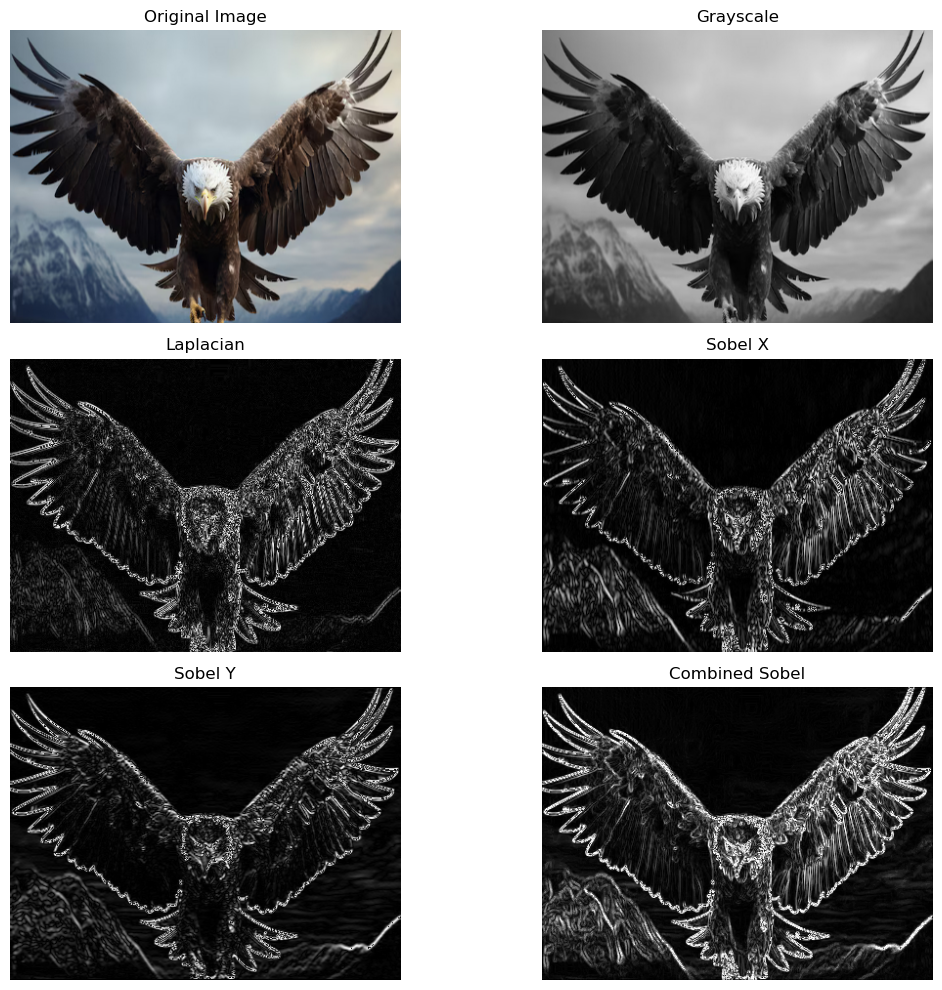

In [3]:
"""edge detection on an image using the Laplacian and Sobel operators"""
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")
img = cv2.resize(img, (400, 300))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Laplacian Derivative
lap = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))

# Sobel operation (both X and Y directions)
sobelX = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobelY = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

# Combine Sobel X and Sobel Y
sobel_combined = cv2.bitwise_or(sobelX, sobelY)

# Display images using Matplotlib
plt.figure(figsize=(12, 10))

titles = ["Original Image", "Grayscale", "Laplacian", "Sobel X", "Sobel Y", "Combined Sobel"]
images = [img, img_gray, lap, sobelX, sobelY, sobel_combined]

for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

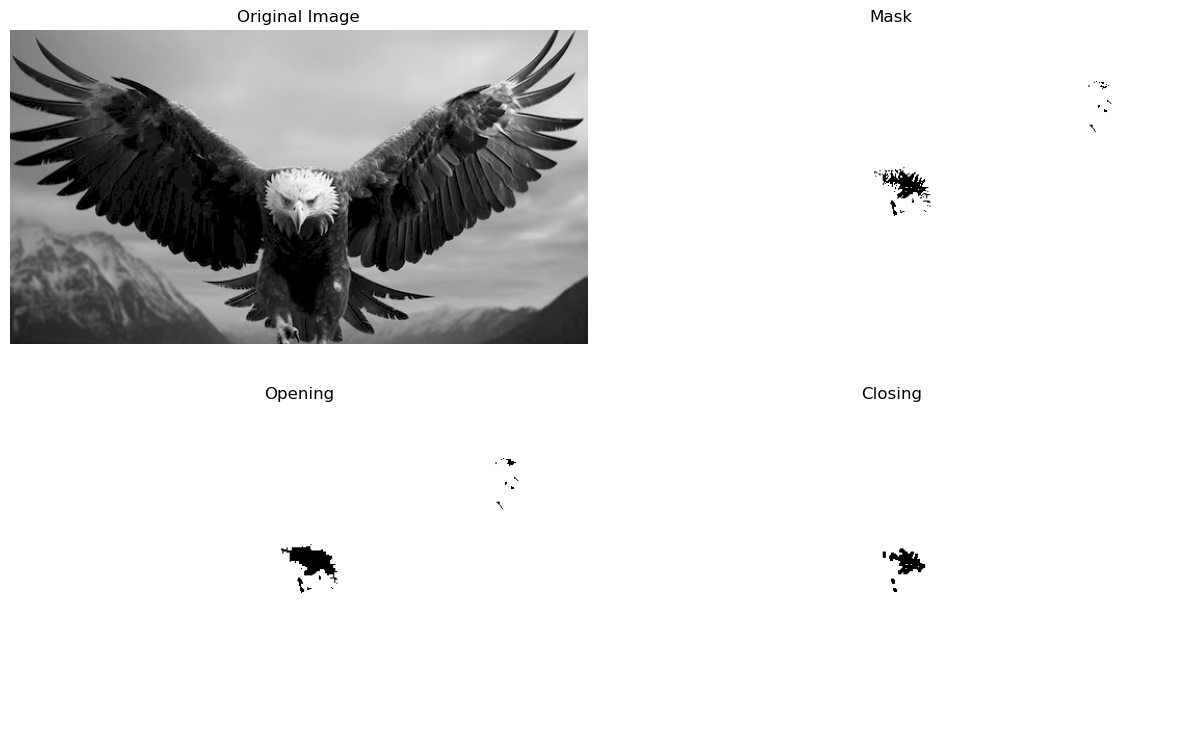

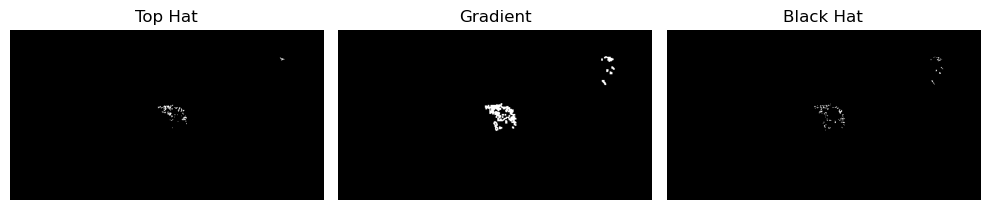

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png", 0)

# Apply thresholding to create a mask
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

# Define a 3x3 kernel
kernel = np.ones((3, 3), np.uint8)

# Opening (erosion followed by dilation)
o = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Closing (dilation followed by erosion)
c = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Display images using Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(o, cmap='gray')
plt.title("Opening")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(c, cmap='gray')
plt.title("Closing")
plt.axis('off')

plt.tight_layout()
plt.show()

# Optional operations
x1 = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)   # Difference between mask and opening
x2 = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel) # Difference between dilation and erosion
x3 = cv2.morphologyEx(mask, cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.imshow(x1, cmap='gray')
plt.title("Top Hat")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(x2, cmap='gray')
plt.title("Gradient")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(x3, cmap='gray')
plt.title("Black Hat")
plt.axis('off')

plt.tight_layout()
plt.show()

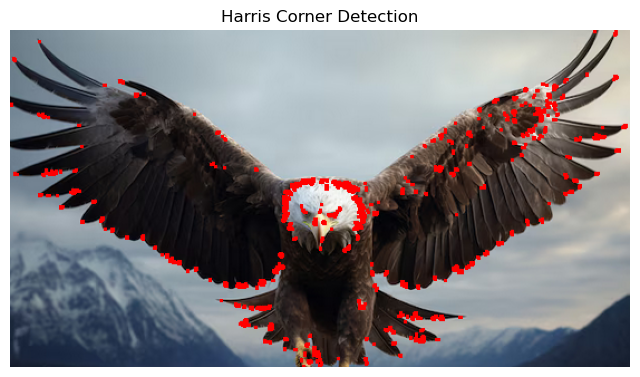

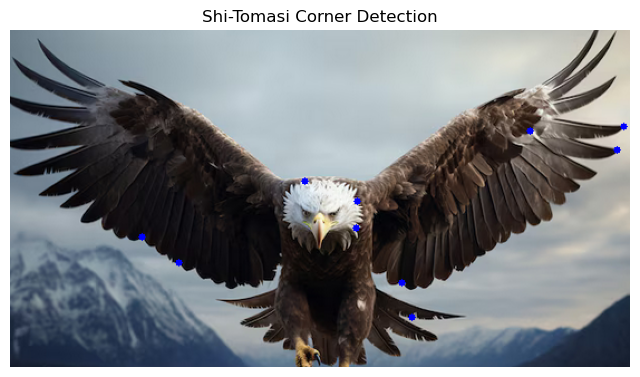

In [5]:
"""Shi-Tomasi Corner Detector"""
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the shapes image
img = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply the Harris Corner Detector
gray = np.float32(gray)
res = cv2.cornerHarris(gray, 2, 3, 0.04)
res = cv2.dilate(res, None)
img[res > 0.01 * res.max()] = [0, 0, 255]

# Display the result
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")
plt.show()

#-------------------------------------------

# Load the shapes image again
img = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply the Shi-Tomasi Corner Detector
corners = cv2.goodFeaturesToTrack(gray, 10, 0.01, 20)
corners = np.int64(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

# Display the result
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis("off")
plt.show()


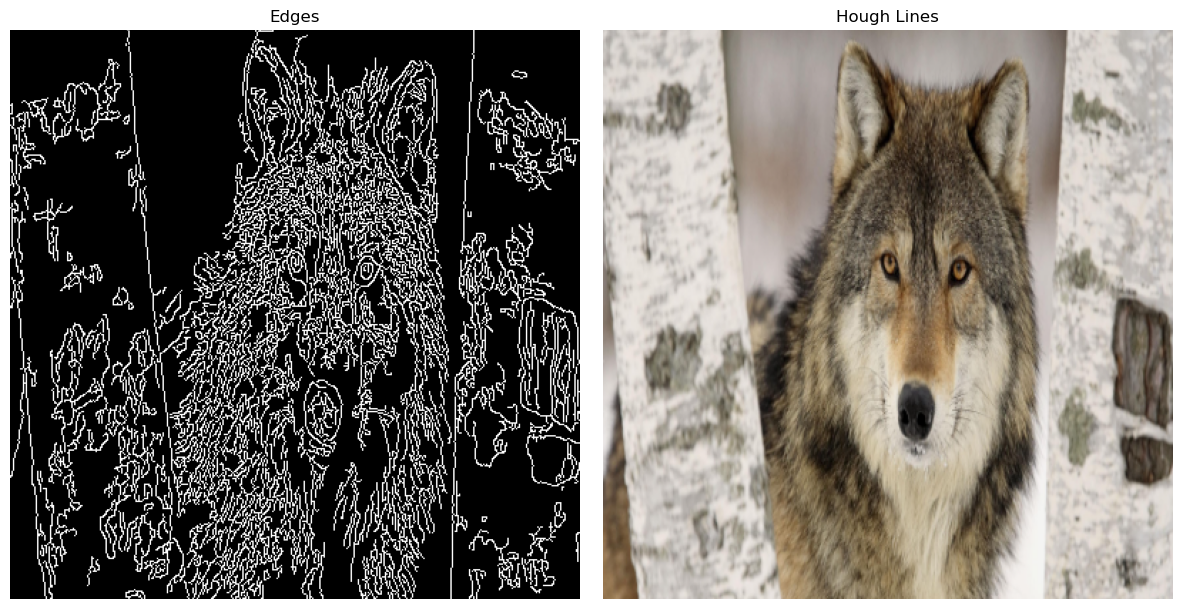

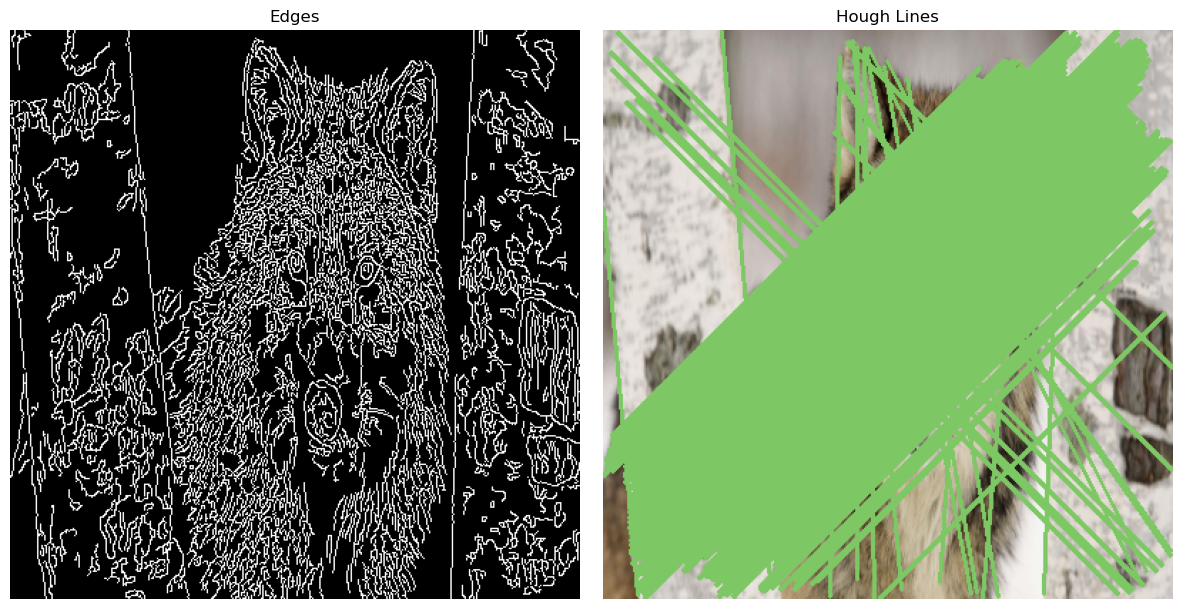

In [9]:
"""the detection of lines in images"""
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_ = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\wolfss.png")
img_ = cv2.resize(img_, (400, 400))
gray_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
edges_ = cv2.Canny(gray_, 10, 200, apertureSize=3)

# Apply Hough Line Transform
lines_ = cv2.HoughLines(edges_, 1, np.pi / 180, 200)

if lines_ is not None:
    for rho, theta in lines_[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_, (x1, y1), (x2, y2), (255, 0, 255), 2)

# Load the square image
img_square = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\wolfss.png")
img_square = cv2.resize(img_square, (400, 400))
gray_square = cv2.cvtColor(img_square, cv2.COLOR_BGR2GRAY)
edges_square = cv2.Canny(gray_square, 50, 150, apertureSize=3)

# Apply Probabilistic Hough Line Transform
lines_square = cv2.HoughLinesP(edges_square, 1, np.pi / 180, 100, minLineLength=8, maxLineGap=100)

if lines_square is not None:
    for line in lines_square:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_square, (x1, y1), (x2, y2), (100, 200, 125), 2)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(edges_, cv2.COLOR_BGR2RGB))
plt.title("Edges")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))
plt.title("Hough Lines")
plt.axis("off")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(edges_square, cv2.COLOR_BGR2RGB))
plt.title("Edges")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_square, cv2.COLOR_BGR2RGB))
plt.title("Hough Lines")
plt.axis("off")

plt.tight_layout()
plt.show()